In [1]:
import cv2
import matplotlib.pyplot as plt

from PIL import Image as PilImage
from IPython.display import Image

%matplotlib inline

# Detecting face

## Loading photo

In [2]:
img_path = 'opencv_files/test.jpg'


In [3]:
size = (300, 300)
im = PilImage.open(img_path)
im.thumbnail(size, PilImage.ANTIALIAS)
im.save(img_path, "JPEG")

In [4]:
img = cv2.imread(img_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

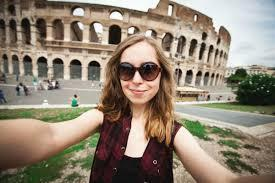

In [5]:
Image(filename=img_path) 

## Creating Cascade Classifier for detecting face

In [6]:
face_cascade = cv2.CascadeClassifier('opencv_files/data/haarcascades/haarcascade_frontalface_default.xml')

## Finding faces

In [7]:
rects = face_cascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30),
    flags = cv2.CASCADE_SCALE_IMAGE
)

rects

array([[106,  48,  62,  62]], dtype=int32)

## Saving results

In [8]:
def save_result(img, rects, detect_img_path):
    for (x, y, w, h) in rects:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

    cv2.imwrite(detect_img_path, img);

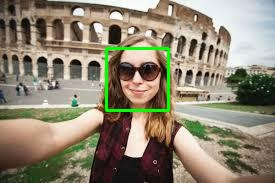

In [9]:
detect_face_img_path = 'opencv_files/detected.jpg'
save_result(img, rects, detect_face_img_path)
Image(filename=detect_face_img_path) 

# Detecting smile

## Clipping face from photo

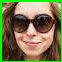

In [10]:
(x, y, w, h) = rects[0]
cropped_img = img[y: y + h, x: x + w]
cropped_img_path = 'opencv_files/cropped.jpg'
cv2.imwrite(cropped_img_path, cropped_img)
Image(filename=cropped_img_path) 


## Creating Cascade Classifier for detecting smile

In [11]:
smile_cascade = cv2.CascadeClassifier('opencv_files/data/haarcascades/haarcascade_smile.xml')
gray2 = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2GRAY)

## Finding smile

In [12]:
rects2 = smile_cascade.detectMultiScale(
    gray2,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(10, 10),
    flags = cv2.CASCADE_SCALE_IMAGE
)

rects2

array([[12, 31, 39, 19]], dtype=int32)

## Show result

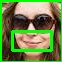

In [13]:
detect_smile_img_path = 'opencv_files/detected_smile.jpg'
save_result(cropped_img, rects2, detect_smile_img_path)
Image(filename=detect_smile_img_path) 